## Q1. What is the mathematical formula for a linear SVM?

The mathematical formulation for a linear Support Vector Machine (SVM) involves finding the hyperplane that maximally separates two classes in a feature space. Given a set of training data points (xi,yi), where xi is the input vector and \yi is the corresponding class label (-1 or 1 for a binary classification problem), the linear SVM aims to find a hyperplane represented by the equation:

f(x) = w*x + b

Here:
- w is the weight vector (normal to the hyperplane),
- x is the input vector,
- b is the bias term.

## Q2. What is the objective function of a linear SVM?

Objective function of a linear SVM is:
Minimize: (1/2) * ||w||^2 subject to yi(w.xi+b) >= 1

Here:
- w is the weight vector (normal to the hyperplane),
- x is the input vector,
- b is the bias term.

## Q3. What is the kernel trick in SVM?

**Kernel Trick in SVM:**
- **Purpose:** Handle non-linear decision boundaries in SVMs.
- **Idea:** Map input data into a higher-dimensional space without explicitly computing the transformation.
- **How:** Use a kernel function that computes the dot product of transformed input vectors in the higher-dimensional space.
- **Common Kernels:**
  1. Linear Kernel
  2. Polynomial Kernel
  3. RBF or Gaussian Kernel
- **Benefits:** Allows SVMs to effectively work with non-linear relationships without explicitly computing the higher-dimensional space.
- **Computational Efficiency:** Enables SVMs to operate in the original input space while implicitly considering the higher-dimensional space.

## Q4. What is the role of support vectors in SVM Explain with example.

**Role of Support Vectors in SVM:**
- **Definition:** Support vectors are the data points that determine the position and orientation of the hyperplane in a Support Vector Machine (SVM).
- **Significance:** These are the critical data points that lie closest to the decision boundary or have been misclassified.
- **Role:** Support vectors play a crucial role in defining the optimal hyperplane and maximizing the margin between classes.
- **Example:**
  - Consider a binary classification problem with two classes, positive and negative.
  - The support vectors are the data points from each class that are closest to the decision boundary (hyperplane).
  - The position and influence of these support vectors determine the placement of the hyperplane.
  - If new data points are added or removed, the position of the hyperplane may change based on the support vectors.
- **Key Property:** Changes in non-support vectors (other data points) that are not on the decision boundary do not affect the SVM model.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

1. **Hyperplane:**
   - The hyperplane in SVM is the decision boundary that separates data points into different classes.
   - For a two-dimensional space, it's a line; for a three-dimensional space, it's a plane, and so on.
   - The equation for a hyperplane in a 2D space is \(w_1x_1 + w_2x_2 + b = 0\), where \((w_1, w_2)\) is the weight vector and \(b\) is the bias.

2. **Margin:**
   - The margin is the distance between the hyperplane and the nearest data point from either class.
   - A larger margin is desirable as it implies better generalization to unseen data.
   - The optimal hyperplane is the one that maximizes this margin.

3. **Hard Margin SVM:**
   - In a hard margin SVM, the goal is to find a hyperplane that perfectly separates the data without any misclassifications.
   - This approach is sensitive to outliers and may not be suitable for noisy datasets.

4. **Soft Margin SVM:**
   - In a soft margin SVM, a balance is sought between achieving a large margin and allowing for some misclassifications.
   - It introduces a slack variable that allows for a certain amount of misclassification.
   - This makes the model more robust to outliers and noisy data.

## Q6. SVM Implementation through Iris dataset.

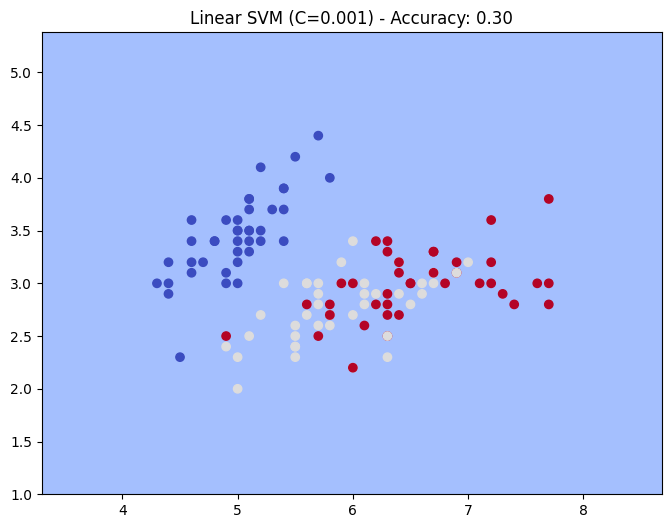

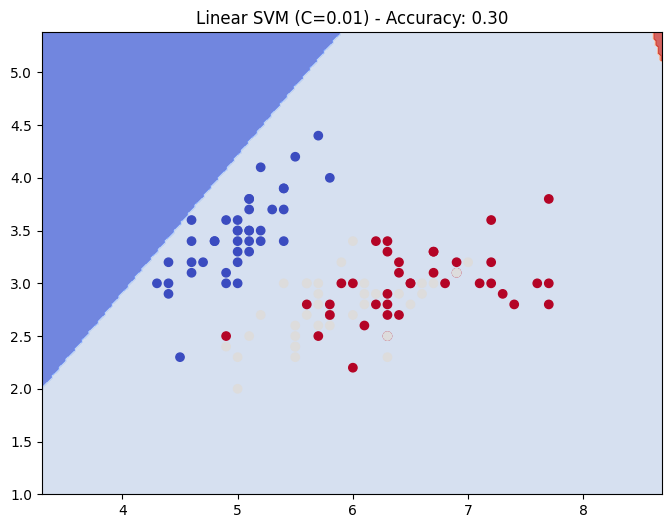

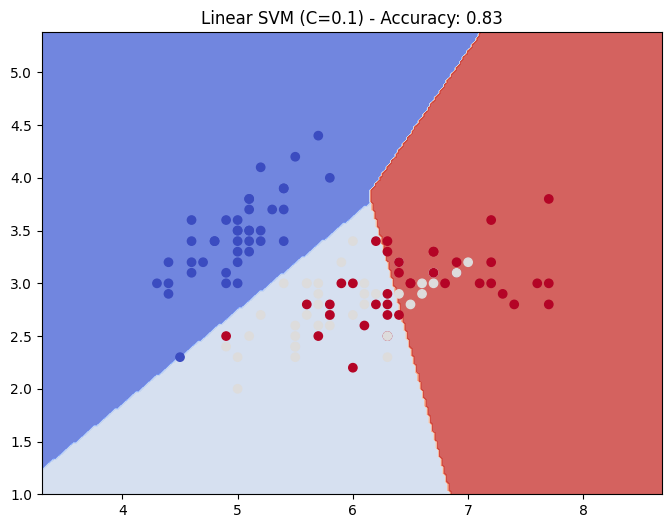

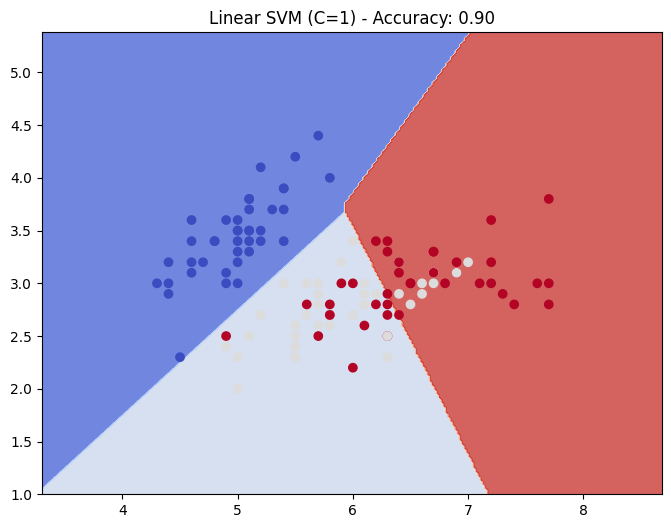

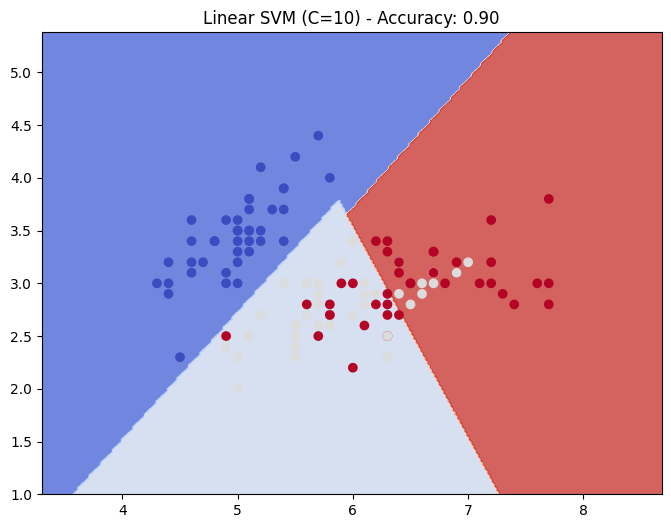

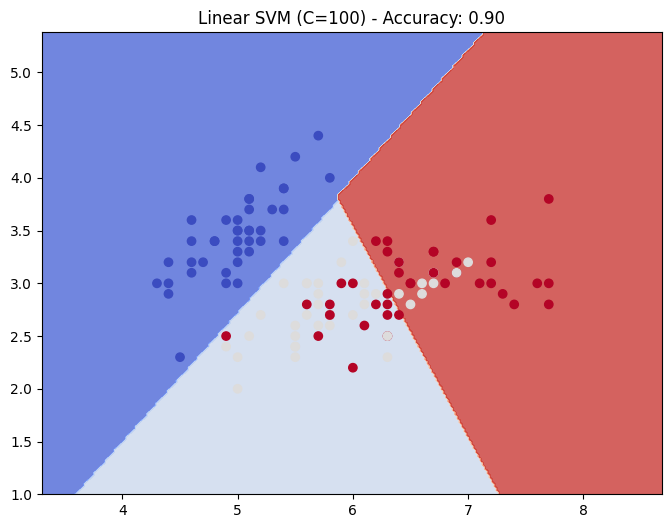

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
def train_linear_svm(X_train, y_train, C):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    return clf

# Predict labels for the testing set
def predict_and_evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy

# Plot decision boundaries
def plot_decision_boundary(clf, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# Train, predict, and evaluate with different values of C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
for C in C_values:
    clf = train_linear_svm(X_train, y_train, C)
    y_pred, accuracy = predict_and_evaluate(clf, X_test, y_test)

    # Plot decision boundaries for the first two features
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(clf, X_train, y_train)
    plt.title(f'Linear SVM (C={C}) - Accuracy: {accuracy:.2f}')
    plt.show()
